In [1]:
import time
start = time.perf_counter()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

from itertools import product
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

import warnings
warnings.filterwarnings('ignore')

Importing plotly failed. Interactive plots will not work.


In [3]:
plt.rcParams['figure.figsize'] = (10, 7.5)
plt.rcParams['axes.grid'] = False

## 19.7 Exercises
### 19.7.1 Forecast the number of air passengers with Prophet

In [4]:
df = pd.read_csv('../data/air-passengers.csv')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


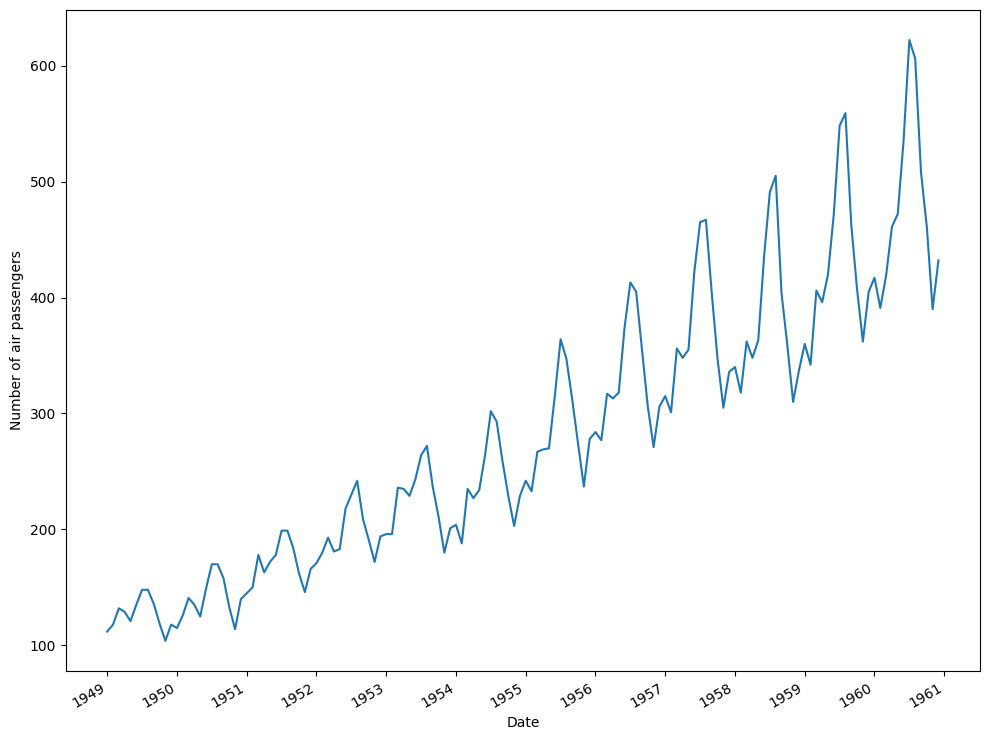

In [5]:
fig, ax = plt.subplots()

ax.plot(df['Month'], df['Passengers'])
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()

In [6]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
from pandas.tseries.offsets import MonthEnd

df['ds'] = pd.to_datetime(df['ds']) + MonthEnd(1)

df.head()

,ds,y
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


In [8]:
train = df[:-12]
test = df[-12:]

In [9]:
train.tail()

,ds,y
127,1959-08-31,559
128,1959-09-30,463
129,1959-10-31,407
130,1959-11-30,362
131,1959-12-31,405


In [10]:
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]

mses = []

#cutoffs = pd.date_range(start='1953-01-31', end='1959-12-31', freq='12ME')
cutoffs = pd.date_range(start='1953-01-31', end='1958-12-31', freq='12ME')

for param in params:
    m = Prophet(**param, seasonality_mode='multiplicative')
    m.add_country_holidays(country_name='US')
    m.fit(train)
    
    df_cv = cross_validation(model=m, horizon='365 days', cutoffs=cutoffs)
    df_p = performance_metrics(df_cv, rolling_window=1)
    mses.append(df_p['mse'].values[0])
    
tuning_results = pd.DataFrame(params)
tuning_results['mse'] = mses

09:16:11 - cmdstanpy - INFO - Chain [1] start processing
09:16:11 - cmdstanpy - INFO - Chain [1] done processing
09:16:11 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
09:16:11 - cmdstanpy - INFO - Chain [1] start processing
09:16:12 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

09:16:12 - cmdstanpy - INFO - Chain [1] start processing
09:16:12 - cmdstanpy - INFO - Chain [1] done processing
09:16:12 - cmdstanpy - INFO - Chain [1] start processing
09:16:12 - cmdstanpy - INFO - Chain [1] done processing
09:16:12 - cmdstanpy - INFO - Chain [1] start processing
09:16:13 - cmdstanpy - INFO - Chain [1] done processing
09:16:13 - cmdstanpy - INFO - Chain [1] start processing
09:16:13 - cmdstanpy - INFO - Chain [1] done processing
09:16:13 - cmdstanpy - INFO - Chain [1] start processing
09:16:13 - cmdstanpy - INFO - Chain [1] done processing
09:16:13 - cmdstanpy - INFO - Chain [1] start processing
09:16:13 - cmdstanpy - INFO - Chain [1] done processing
09:16:13 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
09:16:13 - cmdstanpy - INFO - Chain [1] start processing
09:16:14 - cmdstanpy - INFO - Chain [1] done processing
09:16:14 - cmdstanpy - INFO - Chain [1] start processing
09:16:14 - 

  0%|          | 0/6 [00:00<?, ?it/s]

09:16:14 - cmdstanpy - INFO - Chain [1] start processing
09:16:14 - cmdstanpy - INFO - Chain [1] done processing
09:16:15 - cmdstanpy - INFO - Chain [1] start processing
09:16:15 - cmdstanpy - INFO - Chain [1] done processing
09:16:15 - cmdstanpy - INFO - Chain [1] start processing
09:16:15 - cmdstanpy - INFO - Chain [1] done processing
09:16:15 - cmdstanpy - INFO - Chain [1] start processing
09:16:15 - cmdstanpy - INFO - Chain [1] done processing
09:16:15 - cmdstanpy - INFO - Chain [1] start processing
09:16:16 - cmdstanpy - INFO - Chain [1] done processing
09:16:16 - cmdstanpy - INFO - Chain [1] start processing
09:16:16 - cmdstanpy - INFO - Chain [1] done processing
09:16:16 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
09:16:16 - cmdstanpy - INFO - Chain [1] start processing
09:16:16 - cmdstanpy - INFO - Chain [1] done processing
09:16:16 - cmdstanpy - INFO - Chain [1] start processing
09:16:16 - 

  0%|          | 0/6 [00:00<?, ?it/s]

09:16:17 - cmdstanpy - INFO - Chain [1] start processing
09:16:17 - cmdstanpy - INFO - Chain [1] done processing
09:16:17 - cmdstanpy - INFO - Chain [1] start processing
09:16:17 - cmdstanpy - INFO - Chain [1] done processing
09:16:17 - cmdstanpy - INFO - Chain [1] start processing
09:16:17 - cmdstanpy - INFO - Chain [1] done processing
09:16:18 - cmdstanpy - INFO - Chain [1] start processing
09:16:18 - cmdstanpy - INFO - Chain [1] done processing
09:16:18 - cmdstanpy - INFO - Chain [1] start processing
09:16:18 - cmdstanpy - INFO - Chain [1] done processing
09:16:18 - cmdstanpy - INFO - Chain [1] start processing
09:16:18 - cmdstanpy - INFO - Chain [1] done processing
09:16:18 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
09:16:18 - cmdstanpy - INFO - Chain [1] start processing
09:16:19 - cmdstanpy - INFO - Chain [1] done processing
09:16:19 - cmdstanpy - INFO - Chain [1] start processing
09:16:19 - 

  0%|          | 0/6 [00:00<?, ?it/s]

09:16:19 - cmdstanpy - INFO - Chain [1] start processing
09:16:19 - cmdstanpy - INFO - Chain [1] done processing
09:16:20 - cmdstanpy - INFO - Chain [1] start processing
09:16:20 - cmdstanpy - INFO - Chain [1] done processing
09:16:20 - cmdstanpy - INFO - Chain [1] start processing
09:16:20 - cmdstanpy - INFO - Chain [1] done processing
09:16:20 - cmdstanpy - INFO - Chain [1] start processing
09:16:20 - cmdstanpy - INFO - Chain [1] done processing
09:16:21 - cmdstanpy - INFO - Chain [1] start processing
09:16:21 - cmdstanpy - INFO - Chain [1] done processing
09:16:21 - cmdstanpy - INFO - Chain [1] start processing
09:16:21 - cmdstanpy - INFO - Chain [1] done processing
09:16:21 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
09:16:21 - cmdstanpy - INFO - Chain [1] start processing
09:16:21 - cmdstanpy - INFO - Chain [1] done processing
09:16:21 - cmdstanpy - INFO - Chain [1] start processing
09:16:21 - 

  0%|          | 0/6 [00:00<?, ?it/s]

09:16:21 - cmdstanpy - INFO - Chain [1] start processing
09:16:22 - cmdstanpy - INFO - Chain [1] done processing
09:16:22 - cmdstanpy - INFO - Chain [1] start processing
09:16:22 - cmdstanpy - INFO - Chain [1] done processing
09:16:22 - cmdstanpy - INFO - Chain [1] start processing
09:16:22 - cmdstanpy - INFO - Chain [1] done processing
09:16:22 - cmdstanpy - INFO - Chain [1] start processing
09:16:23 - cmdstanpy - INFO - Chain [1] done processing
09:16:23 - cmdstanpy - INFO - Chain [1] start processing
09:16:23 - cmdstanpy - INFO - Chain [1] done processing
09:16:23 - cmdstanpy - INFO - Chain [1] start processing
09:16:23 - cmdstanpy - INFO - Chain [1] done processing
09:16:23 - cmdstanpy - INFO - Chain [1] start processing
09:16:23 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

09:16:23 - cmdstanpy - INFO - Chain [1] start processing
09:16:24 - cmdstanpy - INFO - Chain [1] done processing
09:16:24 - cmdstanpy - INFO - Chain [1] start processing
09:16:24 - cmdstanpy - INFO - Chain [1] done processing
09:16:24 - cmdstanpy - INFO - Chain [1] start processing
09:16:24 - cmdstanpy - INFO - Chain [1] done processing
09:16:24 - cmdstanpy - INFO - Chain [1] start processing
09:16:25 - cmdstanpy - INFO - Chain [1] done processing
09:16:25 - cmdstanpy - INFO - Chain [1] start processing
09:16:26 - cmdstanpy - INFO - Chain [1] done processing
09:16:26 - cmdstanpy - INFO - Chain [1] start processing
09:16:26 - cmdstanpy - INFO - Chain [1] done processing
09:16:26 - cmdstanpy - INFO - Chain [1] start processing
09:16:26 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

09:16:26 - cmdstanpy - INFO - Chain [1] start processing
09:16:26 - cmdstanpy - INFO - Chain [1] done processing
09:16:26 - cmdstanpy - INFO - Chain [1] start processing
09:16:27 - cmdstanpy - INFO - Chain [1] done processing
09:16:27 - cmdstanpy - INFO - Chain [1] start processing
09:16:27 - cmdstanpy - INFO - Chain [1] done processing
09:16:27 - cmdstanpy - INFO - Chain [1] start processing
09:16:28 - cmdstanpy - INFO - Chain [1] done processing
09:16:28 - cmdstanpy - INFO - Chain [1] start processing
09:16:28 - cmdstanpy - INFO - Chain [1] done processing
09:16:28 - cmdstanpy - INFO - Chain [1] start processing
09:16:28 - cmdstanpy - INFO - Chain [1] done processing
09:16:29 - cmdstanpy - INFO - Chain [1] start processing
09:16:29 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

09:16:29 - cmdstanpy - INFO - Chain [1] start processing
09:16:29 - cmdstanpy - INFO - Chain [1] done processing
09:16:29 - cmdstanpy - INFO - Chain [1] start processing
09:16:29 - cmdstanpy - INFO - Chain [1] done processing
09:16:29 - cmdstanpy - INFO - Chain [1] start processing
09:16:30 - cmdstanpy - INFO - Chain [1] done processing
09:16:30 - cmdstanpy - INFO - Chain [1] start processing
09:16:30 - cmdstanpy - INFO - Chain [1] done processing
09:16:30 - cmdstanpy - INFO - Chain [1] start processing
09:16:31 - cmdstanpy - INFO - Chain [1] done processing
09:16:31 - cmdstanpy - INFO - Chain [1] start processing
09:16:31 - cmdstanpy - INFO - Chain [1] done processing
09:16:31 - cmdstanpy - INFO - Chain [1] start processing
09:16:31 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

09:16:31 - cmdstanpy - INFO - Chain [1] start processing
09:16:32 - cmdstanpy - INFO - Chain [1] done processing
09:16:32 - cmdstanpy - INFO - Chain [1] start processing
09:16:32 - cmdstanpy - INFO - Chain [1] done processing
09:16:32 - cmdstanpy - INFO - Chain [1] start processing
09:16:32 - cmdstanpy - INFO - Chain [1] done processing
09:16:33 - cmdstanpy - INFO - Chain [1] start processing
09:16:33 - cmdstanpy - INFO - Chain [1] done processing
09:16:33 - cmdstanpy - INFO - Chain [1] start processing
09:16:34 - cmdstanpy - INFO - Chain [1] done processing
09:16:34 - cmdstanpy - INFO - Chain [1] start processing
09:16:34 - cmdstanpy - INFO - Chain [1] done processing
09:16:34 - cmdstanpy - INFO - Chain [1] start processing
09:16:34 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

09:16:34 - cmdstanpy - INFO - Chain [1] start processing
09:16:34 - cmdstanpy - INFO - Chain [1] done processing
09:16:34 - cmdstanpy - INFO - Chain [1] start processing
09:16:35 - cmdstanpy - INFO - Chain [1] done processing
09:16:35 - cmdstanpy - INFO - Chain [1] start processing
09:16:35 - cmdstanpy - INFO - Chain [1] done processing
09:16:35 - cmdstanpy - INFO - Chain [1] start processing
09:16:36 - cmdstanpy - INFO - Chain [1] done processing
09:16:36 - cmdstanpy - INFO - Chain [1] start processing
09:16:37 - cmdstanpy - INFO - Chain [1] done processing
09:16:37 - cmdstanpy - INFO - Chain [1] start processing
09:16:37 - cmdstanpy - INFO - Chain [1] done processing
09:16:37 - cmdstanpy - INFO - Chain [1] start processing
09:16:37 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

09:16:37 - cmdstanpy - INFO - Chain [1] start processing
09:16:38 - cmdstanpy - INFO - Chain [1] done processing
09:16:38 - cmdstanpy - INFO - Chain [1] start processing
09:16:38 - cmdstanpy - INFO - Chain [1] done processing
09:16:38 - cmdstanpy - INFO - Chain [1] start processing
09:16:39 - cmdstanpy - INFO - Chain [1] done processing
09:16:39 - cmdstanpy - INFO - Chain [1] start processing
09:16:39 - cmdstanpy - INFO - Chain [1] done processing
09:16:40 - cmdstanpy - INFO - Chain [1] start processing
09:16:40 - cmdstanpy - INFO - Chain [1] done processing
09:16:40 - cmdstanpy - INFO - Chain [1] start processing
09:16:40 - cmdstanpy - INFO - Chain [1] done processing
09:16:41 - cmdstanpy - INFO - Chain [1] start processing
09:16:41 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

09:16:41 - cmdstanpy - INFO - Chain [1] start processing
09:16:41 - cmdstanpy - INFO - Chain [1] done processing
09:16:41 - cmdstanpy - INFO - Chain [1] start processing
09:16:42 - cmdstanpy - INFO - Chain [1] done processing
09:16:42 - cmdstanpy - INFO - Chain [1] start processing
09:16:42 - cmdstanpy - INFO - Chain [1] done processing
09:16:42 - cmdstanpy - INFO - Chain [1] start processing
09:16:43 - cmdstanpy - INFO - Chain [1] done processing
09:16:43 - cmdstanpy - INFO - Chain [1] start processing
09:16:43 - cmdstanpy - INFO - Chain [1] done processing
09:16:44 - cmdstanpy - INFO - Chain [1] start processing
09:16:44 - cmdstanpy - INFO - Chain [1] done processing
09:16:44 - cmdstanpy - INFO - Chain [1] start processing
09:16:44 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

09:16:44 - cmdstanpy - INFO - Chain [1] start processing
09:16:44 - cmdstanpy - INFO - Chain [1] done processing
09:16:44 - cmdstanpy - INFO - Chain [1] start processing
09:16:45 - cmdstanpy - INFO - Chain [1] done processing
09:16:45 - cmdstanpy - INFO - Chain [1] start processing
09:16:45 - cmdstanpy - INFO - Chain [1] done processing
09:16:46 - cmdstanpy - INFO - Chain [1] start processing
09:16:46 - cmdstanpy - INFO - Chain [1] done processing
09:16:46 - cmdstanpy - INFO - Chain [1] start processing
09:16:47 - cmdstanpy - INFO - Chain [1] done processing
09:16:47 - cmdstanpy - INFO - Chain [1] start processing
09:16:47 - cmdstanpy - INFO - Chain [1] done processing
09:16:47 - cmdstanpy - INFO - Chain [1] start processing
09:16:47 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

09:16:47 - cmdstanpy - INFO - Chain [1] start processing
09:16:48 - cmdstanpy - INFO - Chain [1] done processing
09:16:48 - cmdstanpy - INFO - Chain [1] start processing
09:16:48 - cmdstanpy - INFO - Chain [1] done processing
09:16:48 - cmdstanpy - INFO - Chain [1] start processing
09:16:49 - cmdstanpy - INFO - Chain [1] done processing
09:16:49 - cmdstanpy - INFO - Chain [1] start processing
09:16:49 - cmdstanpy - INFO - Chain [1] done processing
09:16:49 - cmdstanpy - INFO - Chain [1] start processing
09:16:50 - cmdstanpy - INFO - Chain [1] done processing
09:16:50 - cmdstanpy - INFO - Chain [1] start processing
09:16:50 - cmdstanpy - INFO - Chain [1] done processing
09:16:50 - cmdstanpy - INFO - Chain [1] start processing
09:16:50 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

09:16:50 - cmdstanpy - INFO - Chain [1] start processing
09:16:50 - cmdstanpy - INFO - Chain [1] done processing
09:16:51 - cmdstanpy - INFO - Chain [1] start processing
09:16:51 - cmdstanpy - INFO - Chain [1] done processing
09:16:51 - cmdstanpy - INFO - Chain [1] start processing
09:16:52 - cmdstanpy - INFO - Chain [1] done processing
09:16:52 - cmdstanpy - INFO - Chain [1] start processing
09:16:52 - cmdstanpy - INFO - Chain [1] done processing
09:16:52 - cmdstanpy - INFO - Chain [1] start processing
09:16:53 - cmdstanpy - INFO - Chain [1] done processing
09:16:53 - cmdstanpy - INFO - Chain [1] start processing
09:16:53 - cmdstanpy - INFO - Chain [1] done processing
09:16:53 - cmdstanpy - INFO - Chain [1] start processing
09:16:53 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/6 [00:00<?, ?it/s]

09:16:53 - cmdstanpy - INFO - Chain [1] start processing
09:16:54 - cmdstanpy - INFO - Chain [1] done processing
09:16:54 - cmdstanpy - INFO - Chain [1] start processing
09:16:55 - cmdstanpy - INFO - Chain [1] done processing
09:16:55 - cmdstanpy - INFO - Chain [1] start processing
09:16:55 - cmdstanpy - INFO - Chain [1] done processing
09:16:55 - cmdstanpy - INFO - Chain [1] start processing
09:16:56 - cmdstanpy - INFO - Chain [1] done processing
09:16:56 - cmdstanpy - INFO - Chain [1] start processing
09:16:57 - cmdstanpy - INFO - Chain [1] done processing
09:16:57 - cmdstanpy - INFO - Chain [1] start processing
09:16:57 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
best_params = params[np.argmin(mses)]
print(best_params)

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1}


In [12]:
m = Prophet(**best_params, seasonality_mode='multiplicative')
m.add_country_holidays(country_name='US')
m.fit(train);

09:16:57 - cmdstanpy - INFO - Chain [1] start processing
09:16:57 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
future = m.make_future_dataframe(periods=12, freq='ME')

In [15]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
132,1960-01-31,404.677949,394.368981,414.936542
133,1960-02-29,390.769456,380.618989,400.756658
134,1960-03-31,449.330057,439.332556,459.321085
135,1960-04-30,437.542072,426.578574,449.065025
136,1960-05-31,442.666156,431.623866,453.892381
137,1960-06-30,518.087522,505.679024,530.972828
138,1960-07-31,573.430617,558.249729,587.484468
139,1960-08-31,577.604364,563.146382,590.987354
140,1960-09-30,498.733414,481.922313,513.611538
141,1960-10-31,434.290917,418.968496,449.801699


In [16]:
test[['yhat', 'yhat_lower', 'yhat_upper']] = forecast[['yhat', 'yhat_lower', 'yhat_upper']]
test.head()

,ds,y,yhat,yhat_lower,yhat_upper
132,1960-01-31,417,404.677949,394.368981,414.936542
133,1960-02-29,391,390.769456,380.618989,400.756658
134,1960-03-31,419,449.330057,439.332556,459.321085
135,1960-04-30,461,437.542072,426.578574,449.065025
136,1960-05-31,472,442.666156,431.623866,453.892381


In [17]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [18]:
mape_prophet = mape(test['y'], test['yhat'])

print(mape_prophet)

4.205117806821992


Recall that we obtained a MAPE of 2.85% using a SARIMA model in chapter 8. Therefore, Prophet does not outperform the SARIMA model in this case, since it achieves a MAPE of 4.28%.

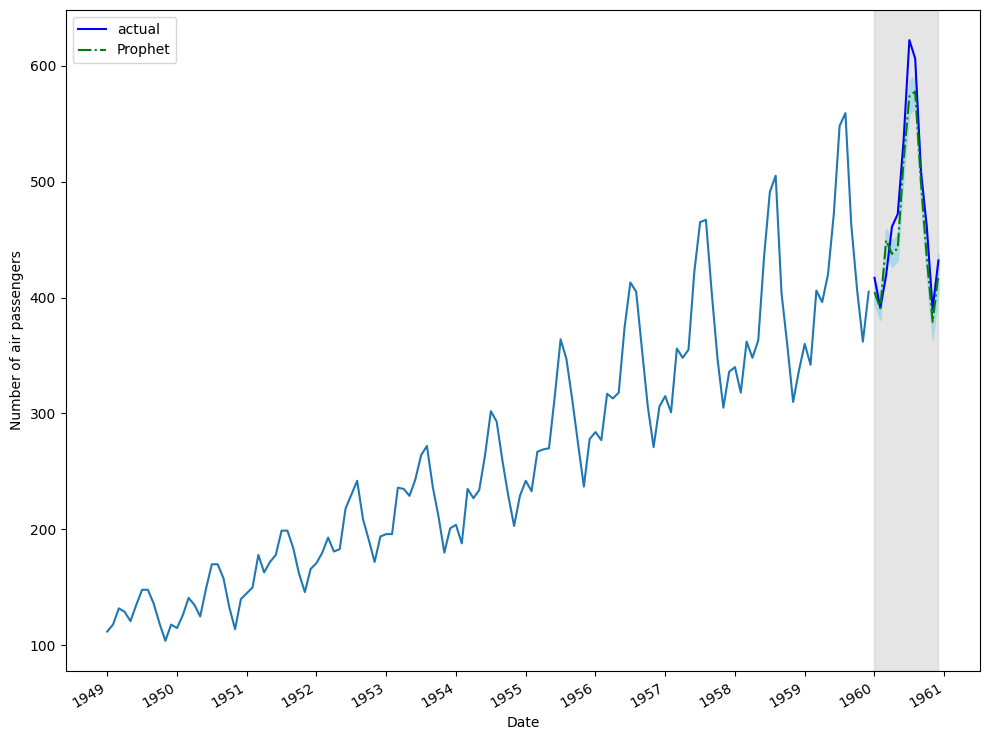

In [19]:
fig, ax = plt.subplots()

ax.plot(train['y'])
ax.plot(test['y'], 'b-', label='actual')
ax.plot(test['yhat'], 'g-.', label='Prophet')

ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')
ax.axvspan(132, 143, color='#808080', alpha=0.2)

ax.legend(loc=2)

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))
plt.fill_between(x=test.index, y1=test['yhat_lower'], y2=test['yhat_upper'], color='lightblue')

fig.autofmt_xdate()
plt.tight_layout()

### 19.7.3 Forecast the monthly volume of anti-diabetic drug prescriptions 

In [20]:
df = pd.read_csv('../data/AusAntidiabeticDrug.csv')
df.head()

,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


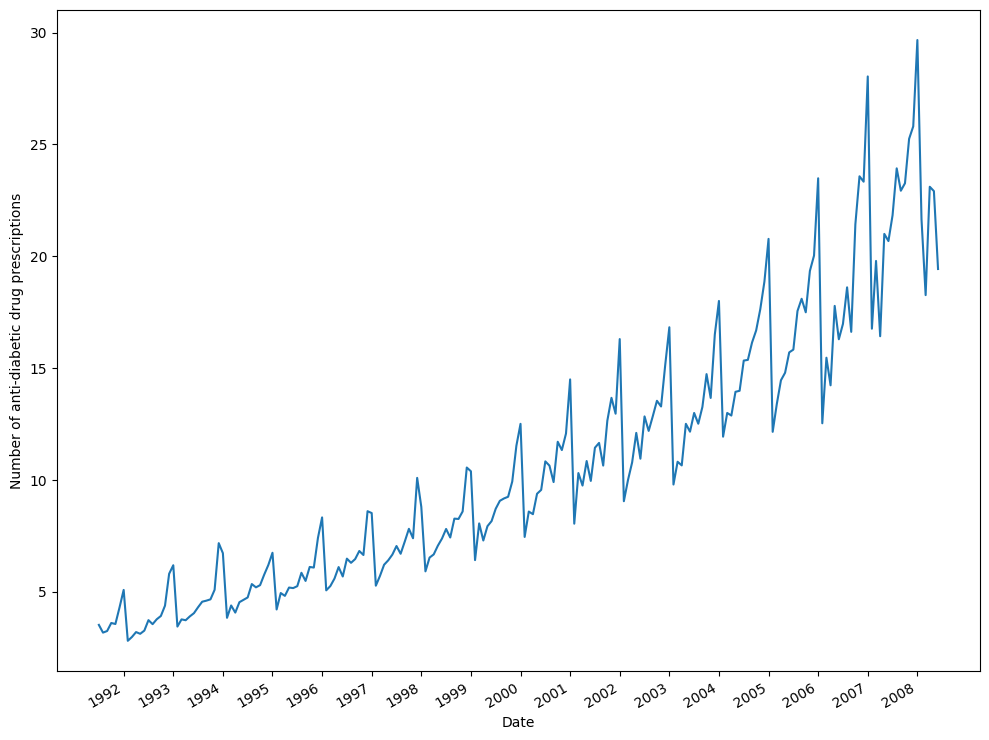

In [21]:
fig, ax = plt.subplots()

ax.plot(df['y'])
ax.set_xlabel('Date')
ax.set_ylabel('Number of anti-diabetic drug prescriptions')

plt.xticks(np.arange(6, 203, 12), np.arange(1992, 2009, 1))

fig.autofmt_xdate()
plt.tight_layout()

In [22]:
train = df[:-36]
test = df[-36:]

In [25]:
train.head()

,ds,y
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [23]:
train.tail()

,ds,y
163,2005-02-01,12.154552
164,2005-03-01,13.402392
165,2005-04-01,14.459239
166,2005-05-01,14.795102
167,2005-06-01,15.705248


In [27]:
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]

mses = []

#cutoffs = pd.date_range(start='1995-01-01', end='2005-06-01', freq='12MS')
cutoffs = pd.date_range(start='1995-01-01', end='2004-06-01', freq='12ME')

for param in params:
    m = Prophet(**param, seasonality_mode='multiplicative')
    m.fit(train)
    
    df_cv = cross_validation(model=m, horizon='365 days', cutoffs=cutoffs)
    df_p = performance_metrics(df_cv, rolling_window=1)
    mses.append(df_p['mse'].values[0])
    
tuning_results = pd.DataFrame(params)
tuning_results['mse'] = mses

09:19:41 - cmdstanpy - INFO - Chain [1] start processing
09:19:41 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/10 [00:00<?, ?it/s]

09:19:41 - cmdstanpy - INFO - Chain [1] start processing
09:19:41 - cmdstanpy - INFO - Chain [1] done processing
09:19:41 - cmdstanpy - INFO - Chain [1] start processing
09:19:43 - cmdstanpy - INFO - Chain [1] done processing
09:19:43 - cmdstanpy - INFO - Chain [1] start processing
09:19:44 - cmdstanpy - INFO - Chain [1] done processing
09:19:44 - cmdstanpy - INFO - Chain [1] start processing
09:19:44 - cmdstanpy - INFO - Chain [1] done processing
09:19:44 - cmdstanpy - INFO - Chain [1] start processing
09:19:44 - cmdstanpy - INFO - Chain [1] done processing
09:19:44 - cmdstanpy - INFO - Chain [1] start processing
09:19:45 - cmdstanpy - INFO - Chain [1] done processing
09:19:45 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
09:19:45 - cmdstanpy - INFO - Chain [1] start processing
09:19:45 - cmdstanpy - INFO - Chain [1] done processing
09:19:45 - cmdstanpy - INFO - Chain [1] start processing
09:19:45 - 

  0%|          | 0/10 [00:00<?, ?it/s]

09:19:46 - cmdstanpy - INFO - Chain [1] start processing
09:19:46 - cmdstanpy - INFO - Chain [1] done processing
09:19:46 - cmdstanpy - INFO - Chain [1] start processing
09:19:46 - cmdstanpy - INFO - Chain [1] done processing
09:19:46 - cmdstanpy - INFO - Chain [1] start processing
09:19:46 - cmdstanpy - INFO - Chain [1] done processing
09:19:47 - cmdstanpy - INFO - Chain [1] start processing
09:19:47 - cmdstanpy - INFO - Chain [1] done processing
09:19:47 - cmdstanpy - INFO - Chain [1] start processing
09:19:47 - cmdstanpy - INFO - Chain [1] done processing
09:19:47 - cmdstanpy - INFO - Chain [1] start processing
09:19:47 - cmdstanpy - INFO - Chain [1] done processing
09:19:47 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
09:19:47 - cmdstanpy - INFO - Chain [1] start processing
09:19:47 - cmdstanpy - INFO - Chain [1] done processing
09:19:47 - cmdstanpy - INFO - Chain [1] start processing
09:19:47 - 

  0%|          | 0/10 [00:00<?, ?it/s]

09:19:49 - cmdstanpy - INFO - Chain [1] start processing
09:19:49 - cmdstanpy - INFO - Chain [1] done processing
09:19:49 - cmdstanpy - INFO - Chain [1] start processing
09:19:49 - cmdstanpy - INFO - Chain [1] done processing
09:19:49 - cmdstanpy - INFO - Chain [1] start processing
09:19:50 - cmdstanpy - INFO - Chain [1] done processing
09:19:50 - cmdstanpy - INFO - Chain [1] start processing
09:19:51 - cmdstanpy - INFO - Chain [1] done processing
09:19:51 - cmdstanpy - INFO - Chain [1] start processing
09:19:51 - cmdstanpy - INFO - Chain [1] done processing
09:19:51 - cmdstanpy - INFO - Chain [1] start processing
09:19:51 - cmdstanpy - INFO - Chain [1] done processing
09:19:51 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
09:19:51 - cmdstanpy - INFO - Chain [1] start processing
09:19:52 - cmdstanpy - INFO - Chain [1] done processing
09:19:52 - cmdstanpy - INFO - Chain [1] start processing
09:19:52 - 

  0%|          | 0/10 [00:00<?, ?it/s]

09:19:53 - cmdstanpy - INFO - Chain [1] start processing
09:19:53 - cmdstanpy - INFO - Chain [1] done processing
09:19:53 - cmdstanpy - INFO - Chain [1] start processing
09:19:54 - cmdstanpy - INFO - Chain [1] done processing
09:19:54 - cmdstanpy - INFO - Chain [1] start processing
09:19:54 - cmdstanpy - INFO - Chain [1] done processing
09:19:54 - cmdstanpy - INFO - Chain [1] start processing
09:19:54 - cmdstanpy - INFO - Chain [1] done processing
09:19:54 - cmdstanpy - INFO - Chain [1] start processing
09:19:54 - cmdstanpy - INFO - Chain [1] done processing
09:19:55 - cmdstanpy - INFO - Chain [1] start processing
09:19:55 - cmdstanpy - INFO - Chain [1] done processing
09:19:55 - cmdstanpy - ERROR - Chain [1] error: code '1' Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
09:19:55 - cmdstanpy - INFO - Chain [1] start processing
09:19:55 - cmdstanpy - INFO - Chain [1] done processing
09:19:55 - cmdstanpy - INFO - Chain [1] start processing
09:19:55 - 

  0%|          | 0/10 [00:00<?, ?it/s]

09:19:56 - cmdstanpy - INFO - Chain [1] start processing
09:19:56 - cmdstanpy - INFO - Chain [1] done processing
09:19:57 - cmdstanpy - INFO - Chain [1] start processing
09:19:57 - cmdstanpy - INFO - Chain [1] done processing
09:19:57 - cmdstanpy - INFO - Chain [1] start processing
09:19:57 - cmdstanpy - INFO - Chain [1] done processing
09:19:57 - cmdstanpy - INFO - Chain [1] start processing
09:19:57 - cmdstanpy - INFO - Chain [1] done processing
09:19:57 - cmdstanpy - INFO - Chain [1] start processing
09:19:57 - cmdstanpy - INFO - Chain [1] done processing
09:19:57 - cmdstanpy - INFO - Chain [1] start processing
09:19:57 - cmdstanpy - INFO - Chain [1] done processing
09:19:57 - cmdstanpy - INFO - Chain [1] start processing
09:19:57 - cmdstanpy - INFO - Chain [1] done processing
09:19:57 - cmdstanpy - INFO - Chain [1] start processing
09:19:57 - cmdstanpy - INFO - Chain [1] done processing
09:19:57 - cmdstanpy - INFO - Chain [1] start processing
09:19:57 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/10 [00:00<?, ?it/s]

09:19:58 - cmdstanpy - INFO - Chain [1] start processing
09:19:58 - cmdstanpy - INFO - Chain [1] done processing
09:19:58 - cmdstanpy - INFO - Chain [1] start processing
09:19:58 - cmdstanpy - INFO - Chain [1] done processing
09:19:58 - cmdstanpy - INFO - Chain [1] start processing
09:19:58 - cmdstanpy - INFO - Chain [1] done processing
09:19:58 - cmdstanpy - INFO - Chain [1] start processing
09:19:59 - cmdstanpy - INFO - Chain [1] done processing
09:19:59 - cmdstanpy - INFO - Chain [1] start processing
09:19:59 - cmdstanpy - INFO - Chain [1] done processing
09:19:59 - cmdstanpy - INFO - Chain [1] start processing
09:19:59 - cmdstanpy - INFO - Chain [1] done processing
09:19:59 - cmdstanpy - INFO - Chain [1] start processing
09:19:59 - cmdstanpy - INFO - Chain [1] done processing
09:19:59 - cmdstanpy - INFO - Chain [1] start processing
09:19:59 - cmdstanpy - INFO - Chain [1] done processing
09:19:59 - cmdstanpy - INFO - Chain [1] start processing
09:19:59 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/10 [00:00<?, ?it/s]

09:19:59 - cmdstanpy - INFO - Chain [1] start processing
09:20:00 - cmdstanpy - INFO - Chain [1] done processing
09:20:00 - cmdstanpy - INFO - Chain [1] start processing
09:20:00 - cmdstanpy - INFO - Chain [1] done processing
09:20:00 - cmdstanpy - INFO - Chain [1] start processing
09:20:00 - cmdstanpy - INFO - Chain [1] done processing
09:20:00 - cmdstanpy - INFO - Chain [1] start processing
09:20:00 - cmdstanpy - INFO - Chain [1] done processing
09:20:00 - cmdstanpy - INFO - Chain [1] start processing
09:20:01 - cmdstanpy - INFO - Chain [1] done processing
09:20:01 - cmdstanpy - INFO - Chain [1] start processing
09:20:01 - cmdstanpy - INFO - Chain [1] done processing
09:20:01 - cmdstanpy - INFO - Chain [1] start processing
09:20:01 - cmdstanpy - INFO - Chain [1] done processing
09:20:01 - cmdstanpy - INFO - Chain [1] start processing
09:20:01 - cmdstanpy - INFO - Chain [1] done processing
09:20:01 - cmdstanpy - INFO - Chain [1] start processing
09:20:01 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/10 [00:00<?, ?it/s]

09:20:01 - cmdstanpy - INFO - Chain [1] start processing
09:20:01 - cmdstanpy - INFO - Chain [1] done processing
09:20:02 - cmdstanpy - INFO - Chain [1] start processing
09:20:02 - cmdstanpy - INFO - Chain [1] done processing
09:20:02 - cmdstanpy - INFO - Chain [1] start processing
09:20:02 - cmdstanpy - INFO - Chain [1] done processing
09:20:02 - cmdstanpy - INFO - Chain [1] start processing
09:20:02 - cmdstanpy - INFO - Chain [1] done processing
09:20:02 - cmdstanpy - INFO - Chain [1] start processing
09:20:02 - cmdstanpy - INFO - Chain [1] done processing
09:20:03 - cmdstanpy - INFO - Chain [1] start processing
09:20:03 - cmdstanpy - INFO - Chain [1] done processing
09:20:03 - cmdstanpy - INFO - Chain [1] start processing
09:20:03 - cmdstanpy - INFO - Chain [1] done processing
09:20:03 - cmdstanpy - INFO - Chain [1] start processing
09:20:03 - cmdstanpy - INFO - Chain [1] done processing
09:20:03 - cmdstanpy - INFO - Chain [1] start processing
09:20:03 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/10 [00:00<?, ?it/s]

09:20:03 - cmdstanpy - INFO - Chain [1] start processing
09:20:03 - cmdstanpy - INFO - Chain [1] done processing
09:20:03 - cmdstanpy - INFO - Chain [1] start processing
09:20:03 - cmdstanpy - INFO - Chain [1] done processing
09:20:03 - cmdstanpy - INFO - Chain [1] start processing
09:20:04 - cmdstanpy - INFO - Chain [1] done processing
09:20:04 - cmdstanpy - INFO - Chain [1] start processing
09:20:04 - cmdstanpy - INFO - Chain [1] done processing
09:20:04 - cmdstanpy - INFO - Chain [1] start processing
09:20:04 - cmdstanpy - INFO - Chain [1] done processing
09:20:04 - cmdstanpy - INFO - Chain [1] start processing
09:20:04 - cmdstanpy - INFO - Chain [1] done processing
09:20:04 - cmdstanpy - INFO - Chain [1] start processing
09:20:04 - cmdstanpy - INFO - Chain [1] done processing
09:20:05 - cmdstanpy - INFO - Chain [1] start processing
09:20:05 - cmdstanpy - INFO - Chain [1] done processing
09:20:05 - cmdstanpy - INFO - Chain [1] start processing
09:20:05 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/10 [00:00<?, ?it/s]

09:20:05 - cmdstanpy - INFO - Chain [1] start processing
09:20:05 - cmdstanpy - INFO - Chain [1] done processing
09:20:05 - cmdstanpy - INFO - Chain [1] start processing
09:20:05 - cmdstanpy - INFO - Chain [1] done processing
09:20:06 - cmdstanpy - INFO - Chain [1] start processing
09:20:06 - cmdstanpy - INFO - Chain [1] done processing
09:20:06 - cmdstanpy - INFO - Chain [1] start processing
09:20:06 - cmdstanpy - INFO - Chain [1] done processing
09:20:06 - cmdstanpy - INFO - Chain [1] start processing
09:20:07 - cmdstanpy - INFO - Chain [1] done processing
09:20:07 - cmdstanpy - INFO - Chain [1] start processing
09:20:07 - cmdstanpy - INFO - Chain [1] done processing
09:20:07 - cmdstanpy - INFO - Chain [1] start processing
09:20:07 - cmdstanpy - INFO - Chain [1] done processing
09:20:07 - cmdstanpy - INFO - Chain [1] start processing
09:20:07 - cmdstanpy - INFO - Chain [1] done processing
09:20:07 - cmdstanpy - INFO - Chain [1] start processing
09:20:07 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/10 [00:00<?, ?it/s]

09:20:07 - cmdstanpy - INFO - Chain [1] start processing
09:20:08 - cmdstanpy - INFO - Chain [1] done processing
09:20:08 - cmdstanpy - INFO - Chain [1] start processing
09:20:08 - cmdstanpy - INFO - Chain [1] done processing
09:20:08 - cmdstanpy - INFO - Chain [1] start processing
09:20:08 - cmdstanpy - INFO - Chain [1] done processing
09:20:09 - cmdstanpy - INFO - Chain [1] start processing
09:20:09 - cmdstanpy - INFO - Chain [1] done processing
09:20:09 - cmdstanpy - INFO - Chain [1] start processing
09:20:09 - cmdstanpy - INFO - Chain [1] done processing
09:20:09 - cmdstanpy - INFO - Chain [1] start processing
09:20:09 - cmdstanpy - INFO - Chain [1] done processing
09:20:09 - cmdstanpy - INFO - Chain [1] start processing
09:20:09 - cmdstanpy - INFO - Chain [1] done processing
09:20:09 - cmdstanpy - INFO - Chain [1] start processing
09:20:09 - cmdstanpy - INFO - Chain [1] done processing
09:20:10 - cmdstanpy - INFO - Chain [1] start processing
09:20:10 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/10 [00:00<?, ?it/s]

09:20:10 - cmdstanpy - INFO - Chain [1] start processing
09:20:10 - cmdstanpy - INFO - Chain [1] done processing
09:20:10 - cmdstanpy - INFO - Chain [1] start processing
09:20:11 - cmdstanpy - INFO - Chain [1] done processing
09:20:11 - cmdstanpy - INFO - Chain [1] start processing
09:20:11 - cmdstanpy - INFO - Chain [1] done processing
09:20:11 - cmdstanpy - INFO - Chain [1] start processing
09:20:12 - cmdstanpy - INFO - Chain [1] done processing
09:20:12 - cmdstanpy - INFO - Chain [1] start processing
09:20:12 - cmdstanpy - INFO - Chain [1] done processing
09:20:12 - cmdstanpy - INFO - Chain [1] start processing
09:20:12 - cmdstanpy - INFO - Chain [1] done processing
09:20:13 - cmdstanpy - INFO - Chain [1] start processing
09:20:13 - cmdstanpy - INFO - Chain [1] done processing
09:20:13 - cmdstanpy - INFO - Chain [1] start processing
09:20:13 - cmdstanpy - INFO - Chain [1] done processing
09:20:13 - cmdstanpy - INFO - Chain [1] start processing
09:20:13 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/10 [00:00<?, ?it/s]

09:20:13 - cmdstanpy - INFO - Chain [1] start processing
09:20:13 - cmdstanpy - INFO - Chain [1] done processing
09:20:13 - cmdstanpy - INFO - Chain [1] start processing
09:20:14 - cmdstanpy - INFO - Chain [1] done processing
09:20:14 - cmdstanpy - INFO - Chain [1] start processing
09:20:14 - cmdstanpy - INFO - Chain [1] done processing
09:20:14 - cmdstanpy - INFO - Chain [1] start processing
09:20:15 - cmdstanpy - INFO - Chain [1] done processing
09:20:15 - cmdstanpy - INFO - Chain [1] start processing
09:20:15 - cmdstanpy - INFO - Chain [1] done processing
09:20:15 - cmdstanpy - INFO - Chain [1] start processing
09:20:15 - cmdstanpy - INFO - Chain [1] done processing
09:20:15 - cmdstanpy - INFO - Chain [1] start processing
09:20:15 - cmdstanpy - INFO - Chain [1] done processing
09:20:15 - cmdstanpy - INFO - Chain [1] start processing
09:20:15 - cmdstanpy - INFO - Chain [1] done processing
09:20:15 - cmdstanpy - INFO - Chain [1] start processing
09:20:15 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/10 [00:00<?, ?it/s]

09:20:16 - cmdstanpy - INFO - Chain [1] start processing
09:20:16 - cmdstanpy - INFO - Chain [1] done processing
09:20:16 - cmdstanpy - INFO - Chain [1] start processing
09:20:16 - cmdstanpy - INFO - Chain [1] done processing
09:20:16 - cmdstanpy - INFO - Chain [1] start processing
09:20:17 - cmdstanpy - INFO - Chain [1] done processing
09:20:17 - cmdstanpy - INFO - Chain [1] start processing
09:20:17 - cmdstanpy - INFO - Chain [1] done processing
09:20:17 - cmdstanpy - INFO - Chain [1] start processing
09:20:17 - cmdstanpy - INFO - Chain [1] done processing
09:20:18 - cmdstanpy - INFO - Chain [1] start processing
09:20:18 - cmdstanpy - INFO - Chain [1] done processing
09:20:18 - cmdstanpy - INFO - Chain [1] start processing
09:20:18 - cmdstanpy - INFO - Chain [1] done processing
09:20:18 - cmdstanpy - INFO - Chain [1] start processing
09:20:18 - cmdstanpy - INFO - Chain [1] done processing
09:20:18 - cmdstanpy - INFO - Chain [1] start processing
09:20:18 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/10 [00:00<?, ?it/s]

09:20:18 - cmdstanpy - INFO - Chain [1] start processing
09:20:18 - cmdstanpy - INFO - Chain [1] done processing
09:20:18 - cmdstanpy - INFO - Chain [1] start processing
09:20:19 - cmdstanpy - INFO - Chain [1] done processing
09:20:19 - cmdstanpy - INFO - Chain [1] start processing
09:20:19 - cmdstanpy - INFO - Chain [1] done processing
09:20:19 - cmdstanpy - INFO - Chain [1] start processing
09:20:20 - cmdstanpy - INFO - Chain [1] done processing
09:20:20 - cmdstanpy - INFO - Chain [1] start processing
09:20:20 - cmdstanpy - INFO - Chain [1] done processing
09:20:20 - cmdstanpy - INFO - Chain [1] start processing
09:20:20 - cmdstanpy - INFO - Chain [1] done processing
09:20:20 - cmdstanpy - INFO - Chain [1] start processing
09:20:20 - cmdstanpy - INFO - Chain [1] done processing
09:20:20 - cmdstanpy - INFO - Chain [1] start processing
09:20:20 - cmdstanpy - INFO - Chain [1] done processing
09:20:21 - cmdstanpy - INFO - Chain [1] start processing
09:20:21 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/10 [00:00<?, ?it/s]

09:20:21 - cmdstanpy - INFO - Chain [1] start processing
09:20:21 - cmdstanpy - INFO - Chain [1] done processing
09:20:21 - cmdstanpy - INFO - Chain [1] start processing
09:20:22 - cmdstanpy - INFO - Chain [1] done processing
09:20:22 - cmdstanpy - INFO - Chain [1] start processing
09:20:22 - cmdstanpy - INFO - Chain [1] done processing
09:20:22 - cmdstanpy - INFO - Chain [1] start processing
09:20:22 - cmdstanpy - INFO - Chain [1] done processing
09:20:23 - cmdstanpy - INFO - Chain [1] start processing
09:20:23 - cmdstanpy - INFO - Chain [1] done processing
09:20:23 - cmdstanpy - INFO - Chain [1] start processing
09:20:23 - cmdstanpy - INFO - Chain [1] done processing
09:20:23 - cmdstanpy - INFO - Chain [1] start processing
09:20:23 - cmdstanpy - INFO - Chain [1] done processing
09:20:23 - cmdstanpy - INFO - Chain [1] start processing
09:20:23 - cmdstanpy - INFO - Chain [1] done processing
09:20:23 - cmdstanpy - INFO - Chain [1] start processing
09:20:23 - cmdstanpy - INFO - Chain [1]

In [28]:
best_params = params[np.argmin(mses)]
print(best_params)

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0}


In [29]:
m = Prophet(**best_params, seasonality_mode='multiplicative')
m.fit(train);

09:20:24 - cmdstanpy - INFO - Chain [1] start processing
09:20:24 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
future = m.make_future_dataframe(periods=36, freq='MS')

In [31]:
forecast = m.predict(future)
test[['yhat', 'yhat_lower', 'yhat_upper']] = forecast[['yhat', 'yhat_lower', 'yhat_upper']]

test.head()

,ds,y,yhat,yhat_lower,yhat_upper
168,2005-07-01,15.829550,16.051301,15.458945,16.596444
169,2005-08-01,17.554701,15.852394,15.265866,16.428950
170,2005-09-01,18.100864,16.112765,15.500552,16.681069
171,2005-10-01,17.496668,17.347626,16.774742,17.962374
172,2005-11-01,19.347265,17.513281,16.883895,18.107242


In [32]:
mape_prophet = mape(test['y'], test['yhat'])

print(mape_prophet)

12.17517551137081


In chapter 11, we built a SARIMA model that achieved a MAPE of 7.9%. Using Prophet, we achieved a MAPE of 12.1%. Therefore, Prophet does not outperform SARIMA in this case.

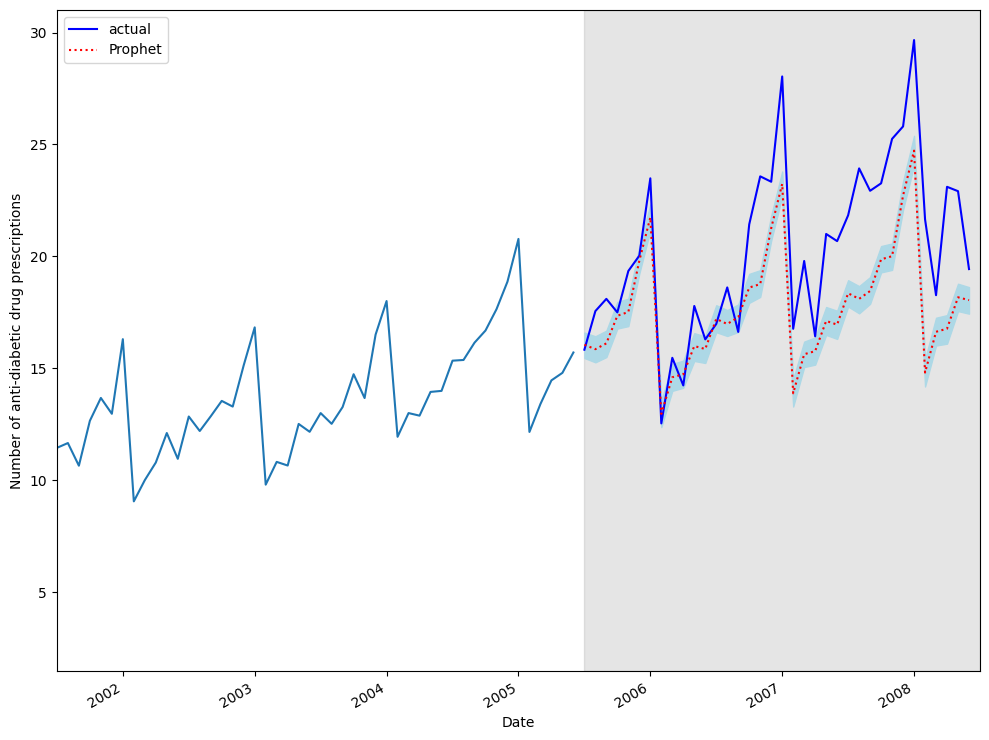

In [33]:
fig, ax = plt.subplots()

ax.plot(train['y'])
ax.plot(test['y'], 'b-', label='actual')
ax.plot(test['yhat'], 'r:', label='Prophet')

ax.set_xlabel('Date')
ax.set_ylabel('Number of anti-diabetic drug prescriptions')
ax.axvspan(168, 204, color='#808080', alpha=0.2)

ax.legend(loc=2)

plt.xticks(np.arange(6, 203, 12), np.arange(1992, 2009, 1))
plt.fill_between(x=test.index, y1=test['yhat_lower'], y2=test['yhat_upper'], color='lightblue')
plt.xlim(120, 204)

fig.autofmt_xdate()
plt.tight_layout()

In [34]:
end = time.perf_counter()

elapsed_time = end - start
print(f"Elapsed time: {elapsed_time:.4f} seconds")

Elapsed time: 253.7938 seconds
